# LLM results

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load results

In [9]:
df = pd.read_csv('llm_results.csv')
df.head()

,Model,Rotation,Condition,Split,Episode,Accuracy
0,GPT,Rule-like,Aligned,test,0,1.0000
1,GPT,Rule-like,Aligned,test,1,0.8750
2,GPT,Rule-like,Aligned,test,2,1.0000
3,GPT,Rule-like,Aligned,test,3,0.8750
4,GPT,Rule-like,Aligned,test,4,0.9375


Plot performance on blocked vs. interleaved

In [5]:
filtered_df = df[df['Condition'].isin(['Blocked', 'Interleaved'])]

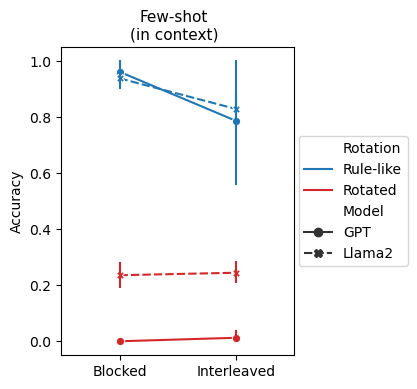

In [6]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 1, figsize=(3, 4), sharey=True)

# Color palette
palette = ['tab:blue', 'tab:red']

# Plotting "blocked vs. interleaved"
sns.lineplot(data=filtered_df,
             x='Condition', y='Accuracy', hue='Rotation', style='Model', 
             markers=True, palette=palette,
             # dashes={'rotated': (2, 2), 'unrotated': ''},
             ax=axes, 
             ci=95, err_style='bars')

# Adjust limits, labels, titles
axes.set_xlim(-0.5, 1.5)
axes.set_xlabel('')
fig.text(0.5, 0.9, "Few-shot\n(in context)", ha='center', fontsize=11)
axes.legend(loc='center left', bbox_to_anchor=(0.99, 0.5))

# Show the plot
plt.show()

Plot performance on all four curriculum conditions

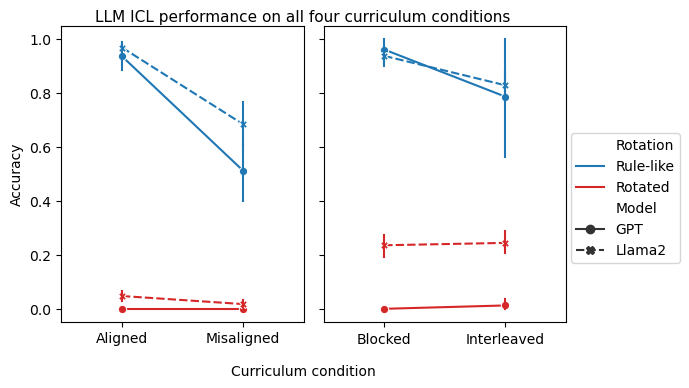

In [7]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(7, 3.5), sharey=True)

# Color palette
palette = ['tab:blue', 'tab:red']

# Plotting "aligned vs. misaligned"
sns.lineplot(data=df[df['Condition'].isin(['Aligned', 'Misaligned'])],
             x='Condition', y='Accuracy', hue='Rotation', style='Model', 
             markers=True, palette=palette,
             ax=axes[0], 
             ci=95, err_style='bars')
    

# Plotting "blocked vs. interleaved"
sns.lineplot(data=df[df['Condition'].isin(['Blocked', 'Interleaved'])],
             x='Condition', y='Accuracy', hue='Rotation', style='Model', 
             markers=True, palette=palette,
             ax=axes[1], 
             ci=95, err_style='bars')

# For each subplot, adjust the x-axis limits
axes[0].set_xlim(-0.5, 1.5)
axes[1].set_xlim(-0.5, 1.5)

# Set titles
axes[0].set_xlabel('')
axes[1].set_xlabel('')
fig.text(0.44, -0.04, 'Curriculum condition', ha='center') # single x-label
fig.text(0.44, 0.97, "LLM ICL performance on all four curriculum conditions", 
         ha='center', fontsize=11)

# Delete extra legend
axes[1].legend(loc=(1.02, 0.2))
axes[0].legend().remove()

# Show the plot
plt.tight_layout()
plt.show()